#####   
<span style="font-family:MV Boli; font-weight:Bold; font-size:2.3em; color:#00b3e5;"> Hierarchical Clustering

#####   
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Importing Library

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster         import AgglomerativeClustering

#####   
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> x, y

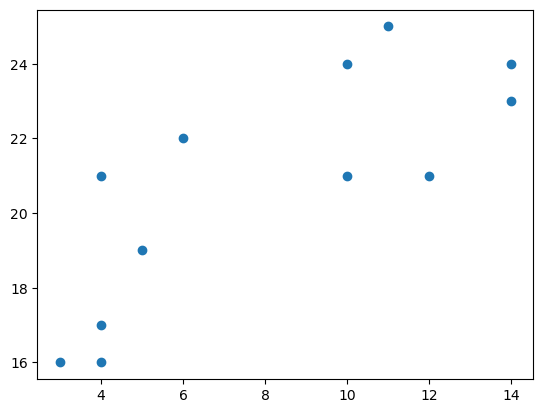

In [2]:
x = [  4,  5, 10,  4,  3, 11, 14,  6, 10, 12, 14,  4 ]
y = [ 21, 19, 24, 17, 16, 25, 24, 22, 21, 21, 23, 16 ]

plt.scatter(x, y)
plt.show()

#####   
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> colors

In [3]:
colors = ['r','b','g']*10000

#####   
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> data

In [4]:
data = pd.DataFrame()
data['x'] = x
data['y'] = y

INDEX = [ "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L" ]
data.index = INDEX

data.head(3)

,x,y
A,4,21
B,5,19
C,10,24


#####   
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> labels

In [5]:
labels = data.index.tolist()
p      = len(labels)

print(p, labels)

12 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']


#####   
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> linkage

In [6]:
linkage_data = linkage( data, method='ward', metric='euclidean' )
print( linkage_data )

[[ 3.         11.          1.          2.        ]
 [ 6.         10.          1.          2.        ]
 [ 4.         12.          1.29099445  3.        ]
 [ 2.          5.          1.41421356  2.        ]
 [ 8.          9.          2.          2.        ]
 [ 0.          1.          2.23606798  2.        ]
 [ 7.         17.          2.88675135  3.        ]
 [15.         16.          5.          4.        ]
 [13.         19.          5.44671155  6.        ]
 [14.         18.          7.85281266  6.        ]
 [20.         21.         21.42428529 12.        ]]


#####   
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Cluster (dendrogram)

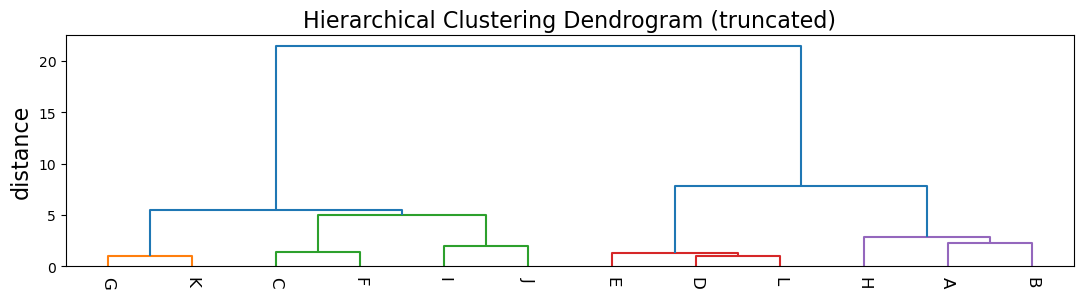

In [12]:
plt.figure(figsize=(13,3))
plt.title('Hierarchical Clustering Dendrogram (truncated)', fontsize=16)
plt.ylabel('distance', fontsize=16, rotation=90 )

R = dendrogram(
      linkage_data
    , truncate_mode   = 'lastp'   # show only the last p merged clusters   # None  'lastp'  'level'
    , p               =  p        # show only the last p merged clusters
    , no_plot         =  True
    )

#print("values passed to leaf_label_func\nleaves : ", R["leaves"])
temp = {}
for i in R["leaves"]: temp[i] = labels[i]
def llf(k): return temp[k]

dendrogram(
      linkage_data
    , truncate_mode   = 'lastp'   # show only the last p merged clusters   # None  'lastp'  'level'
    , p               =  p        # show only the last p merged clusters
    , leaf_label_func = llf
    , leaf_rotation   = -90
    , leaf_font_size  =  12
    , show_contracted = True      # to get a distribution impression in truncated branches 

    , color_threshold =  5.3      # Double
    , get_leaves      = True 
    , orientation     = 'top'     # 'top'  'bottom'  'left'  'right'
    
    # either count_sort=False  or  distance_sort=False
    , count_sort            = False     # False  'ascending'  'descending'
    , distance_sort         = True      # False  'ascending'  'descending'
    
    , show_leaf_counts      = True      
    , no_plot               = False
    , no_labels             = False
    
    , link_color_func       = None      # lambda k: colors[k]
    , ax                    = None
    , above_threshold_color = 'C0'
            )

plt.show()

#####     

#####     

#####   
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Cluster (Agglomerative)

In [13]:
hierarchical_cluster = AgglomerativeClustering( n_clusters=4, metric='euclidean', linkage='ward' )
Agg_labels           = hierarchical_cluster.fit_predict( data )
print( Agg_labels )

[1 1 0 2 2 0 3 1 0 0 3 2]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


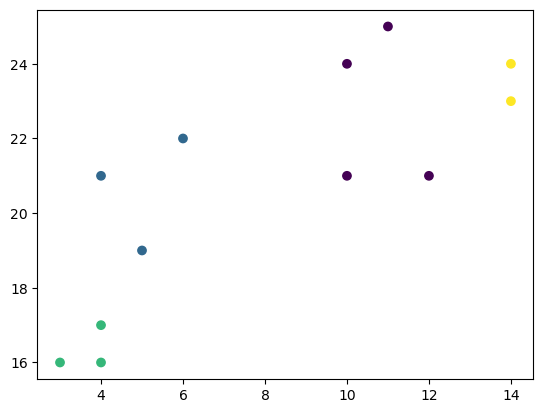

In [14]:
plt.scatter( x, y, c=Agg_labels )
plt.show()

#####    

#####    

#####    